# Caleb Johnson
# cdj2273
# EE 460J Kaggle Competition


# a) First I wanted to look at the data and view a correlation matrix to see if anything stood out. Some slight correlations between columns, but no apparent correlations between columns and Y.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import log1p

%matplotlib inline

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

data = pd.read_csv('train_final.csv')
data = data.sample(frac=1)

X = data.drop('Id', axis=1)
Y = data.Y
X = X.drop('Y', axis=1)
X = X.drop('f24', axis=1)
X = X.drop('f20', axis=1)
X = X.drop('f11', axis=1)
X = X.drop('f6', axis=1)
X = X.drop('f18', axis=1)
X = X.drop('f9', axis=1)
X = X.drop('f5', axis=1)
X = X.drop('f22', axis=1)
X = X.drop('f2', axis=1)
X = X.drop('f21', axis=1)
X = X.drop('f12', axis=1)
X = X.drop('f10', axis=1)

data = pd.DataFrame(X.f1)
X['f25'] = X.f14**2





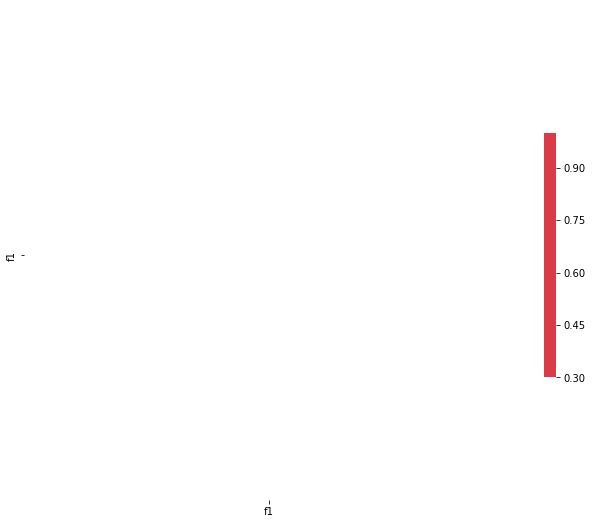

In [5]:

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# b) Check for any missing values. There are none.

In [6]:
[data.iloc[i, j] for i,j in zip(*np.where(pd.isnull(data)))]

[]

# Check all my feature data types and Y data type. (All numerical) Set up my X and Y data.

In [7]:
#prediction_var = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7','f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
 #                 'f21', 'f22', 'f23', 'f24']

#X = data[prediction_var].values
#Y = data.Y.values
#data.info()
#Y.shape

In [9]:
def create_baseline():
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=90, batch_size=500, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
#results = cross_val_score(pipeline, X, Y, cv=kfold)
#print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [16]:
data = pd.read_csv('final_3000.csv')


x_test = data.drop('Id', 1)
yt = pd.DataFrame(data.Y)
x_test = x_test.drop('Y', axis=1)
x_test = x_test.drop('f24', axis=1)
x_test = x_test.drop('f20', axis=1)
x_test = x_test.drop('f11', axis=1)
x_test = x_test.drop('f6', axis=1)
x_test = x_test.drop('f18', axis=1)
x_test = x_test.drop('f9', axis=1)
x_test = x_test.drop('f5', axis=1)
x_test = x_test.drop('f22', axis=1)
x_test = x_test.drop('f2', axis=1)
x_test = x_test.drop('f21', axis=1)
x_test = x_test.drop('f12', axis=1)
x_test = x_test.drop('f10', axis=1)

x_test['f25'] = x_test.f14**2

pipeline.fit(X,Y)
yguess = pipeline.predict(x_test)
score = roc_auc_score(yt, yguess)

C:\Users\caleb\Anaconda3\envs\neuralnets\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\caleb\Anaconda3\envs\neuralnets\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\caleb\Anaconda3\envs\neuralnets\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


,Y
0,1
1,1
2,0
3,1
4,1
5,1
6,0
7,1
8,1
9,1


In [ ]:
yhat = pd.DataFrame(yhat)

In [648]:
yhat.to_csv("NN_Day1")

In [649]:
train_final = pd.read_csv("final_3000.csv")
train_final_Y = train_final.Y
train_final = train_final.drop('Y', axis=1)
train_final = train_final.drop('Id', axis=1)
yguess = pipeline.predict(train_final)
score = roc_auc_score(train_final_Y, yguess)
score

C:\Users\caleb\Anaconda3\envs\neuralnets\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.7141147921502426